# Darvesh Singh Dhillon

### How does someone's Socio-Economic Condition affect their Educational Adaptability? In particular, their Gender, Age, Financial Condition, and Location.

I will be looking at the Age, Gender, Financial Condition, and Location Variables from the Adaptability Dataset. I will be dropping the rest of the columns so I can focus on just the 4 columns I want to compare with the adaptability levels. I will be creating scatterplots with each variable against the adaptability level and compare the slopes of the line(s) of best fit(s). This comparison will show which factor likely affects a person's adaptability level the most. I also want to find a good way to create a weighted score based on the answers provided by students and compared the weighted score for each gender, age, financial condition, and location possibility. If this becomes too much data for me to process for this project, then I may end up dropping a column, most likely the location.

In [211]:
#all the import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import sys  
sys.path.insert(0, 'code/convertAgeToInt.py')

In [212]:
#importing the dataset using a relative path
adapt = pd.read_csv("../data/raw/adaptability.csv")
adapt

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [213]:
#drop all extra columns
del adapt['Education Level']
del adapt['Institution Type']
del adapt['IT Student']
del adapt['Load-shedding']

In [214]:
adapt.rename(columns={'Self Lms': 'Self LMS'}, inplace=True)
#renamed abbreviation to all caps to make it more clear that it is an abbreviation
adapt

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
0,Boy,21-25,Yes,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,Yes,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,No,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,Yes,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,No,Mid,Wifi,4G,1-3,No,Mobile,Low


In [215]:
adapt.head()

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
0,Boy,21-25,Yes,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,Yes,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,Yes,Poor,Mobile Data,3G,0,No,Mobile,Low


In [216]:
adapt.shape

(1205, 10)

In [217]:
adapt.columns

Index(['Gender', 'Age', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self LMS', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [218]:
adapt.nunique()

Gender                 2
Age                    6
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self LMS               2
Device                 3
Adaptivity Level       3
dtype: int64

In [219]:
adapt.apply(lambda col: col.unique())

Gender                                             [Boy, Girl]
Age                    [21-25, 16-20, 11-15, 26-30, 6-10, 1-5]
Location                                             [Yes, No]
Financial Condition                          [Mid, Poor, Rich]
Internet Type                              [Wifi, Mobile Data]
Network Type                                      [4G, 3G, 2G]
Class Duration                                   [3-6, 1-3, 0]
Self LMS                                             [No, Yes]
Device                                 [Tab, Mobile, Computer]
Adaptivity Level                         [Moderate, Low, High]
dtype: object

##### The location is based on whether the student is located in town or not.
##### The LMS refers to whether the institution has its own Learning Management System (LMS) such as Canvas, Moodle, etc.

In [220]:
adapt.describe()

,Gender,Age,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,2,3,2,3,3,2,3,3
top,Boy,21-25,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,935,878,695,775,840,995,1013,625


In [229]:
#saving the processed data
adapt.to_csv("../data/processed/analysis1.csv")

___
## We are now ready to plot the data
___

# Research Area 1:  Gender VS Adaptivity Level

In [221]:
plot1 = adapt[['Adaptivity Level','Gender']]
plot1

,Adaptivity Level,Gender
0,Moderate,Boy
1,Moderate,Girl
2,Moderate,Girl
3,Moderate,Girl
4,Low,Girl
...,...,...
1200,Low,Girl
1201,Moderate,Girl
1202,Moderate,Boy
1203,Low,Girl


In [222]:
plot1.value_counts().reset_index()

,Adaptivity Level,Gender,0
0,Moderate,Boy,347
1,Moderate,Girl,278
2,Low,Boy,245
3,Low,Girl,235
4,High,Boy,71
5,High,Girl,29


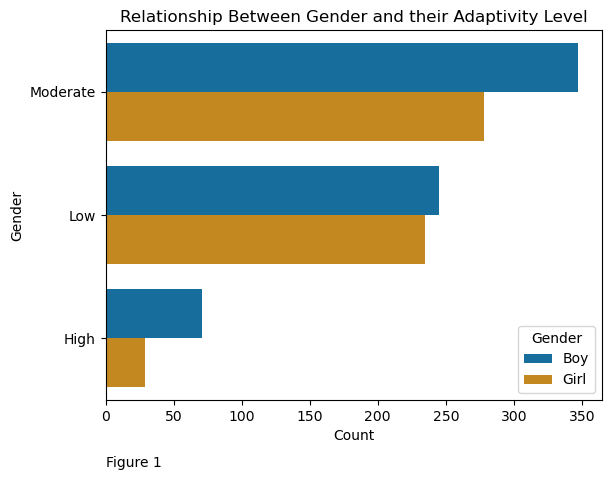

In [223]:
sns.countplot(data = plot1, y='Adaptivity Level', hue = "Gender", palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Relationship Between Gender and their Adaptivity Level')
plt.text(0.17, -0.03, 'Figure 1', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

### Observations
As we can see from this plot, Boys have a higher adaptability level on average
##### **Percent increases:**
**High** - Boys are **144.83%** more adaptive in this range

**Moderate** - Boys are **24.82%** more adaptive in this range

**Low** - Boys are **4.26%** more adaptive in this range

# Research Area 2:  Age VS Adaptivity

In [224]:
plot2 = adapt[['Adaptivity Level','Age', 'Gender']]
plot2

,Adaptivity Level,Age,Gender
0,Moderate,21-25,Boy
1,Moderate,21-25,Girl
2,Moderate,16-20,Girl
3,Moderate,11-15,Girl
4,Low,16-20,Girl
...,...,...,...
1200,Low,16-20,Girl
1201,Moderate,16-20,Girl
1202,Moderate,11-15,Boy
1203,Low,16-20,Girl


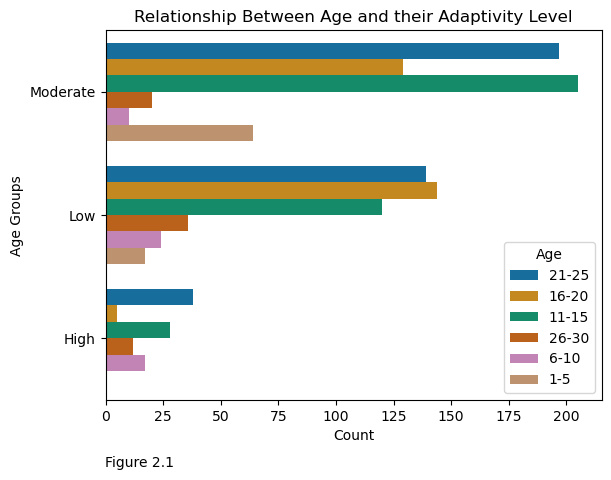

In [225]:
sns.countplot(data = plot2, y='Adaptivity Level', hue = "Age", palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Age Groups')
plt.title('Relationship Between Age and their Adaptivity Level')
plt.text(0.178, -0.03, 'Figure 2.1', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

In [226]:
# this code changes the age ranges to ints to give you a better understanding.
plot3 = plot2.copy()
plot3['Age'] = plot3['Age'].apply(convertAgetoInt)

### Observations
As we can see from this plot, Age ranges 11-15 and 21-25 have the best Adaptivity Level in both the High and Moderate categories. This could be because the age range between the two is when hormones start acting up in teenagers, causing them to be more emotional and unstable in mood compared to many other age ranges.

We can also see that the age group 1-5 does not have any in the high adaptivity. This can also be due to human developement and at these young ages, children can be very unstable and are still learning how to control their wants from their needs.

Now that we have seen how the ages reflect on the adaptivity levels of students, lets compare it back to gender.

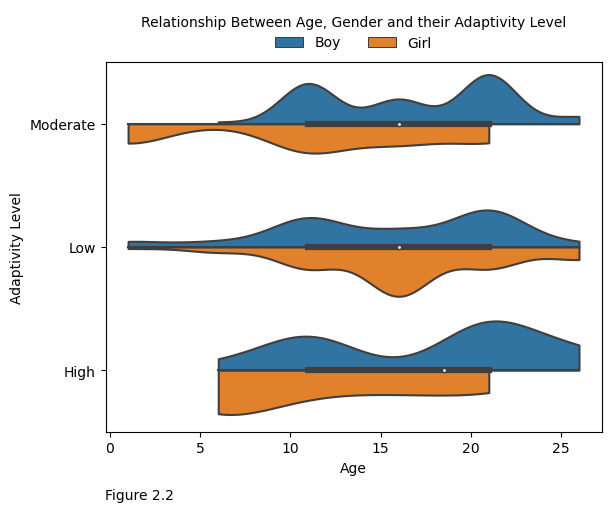

In [227]:
#creating a violin plot to show how gender also plays a role
ax = sns.violinplot(data=plot3, x='Age', y='Adaptivity Level', hue='Gender', split=True, cut=0)
plt.xlabel('Age')
plt.ylabel('Adaptivity Level')
sns.move_legend(ax,"lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Relationship Between Age, Gender and their Adaptivity Level', frameon=False)
plt.text(0.178, -0.03, 'Figure 2.2', ha='center', fontsize=10, transform=plt.gcf().transFigure)
plt.show(close=None, block=None)

As we can see from this plot girls at a younger age have a higher adaptivity level, but when we look at the age ranges from the previous graph, girls have a better adaptivity level compared to boys in the 11-15 range and we are not able to compare girls to boys in the 21-25 age range because we do not have enough data in our dataset. We can also see that girls tend to have a lower Adaptivity Level in their teens compared to boys.